In [1]:
import numpy as np

from data import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention.attention_seq2seq import AttentionSeq2seq
from seq2seq.seq2seq import Seq2seq
from seq2seq.peeky_seq2seq import PeekySeq2seq

In [2]:
# データ読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data("date.txt")
char_to_id, id_to_char = sequence.get_vocab()

In [3]:
# 入力文反転
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

In [4]:
# ハイパーパラメータ
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

In [5]:
model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [6]:
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)
        
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print("val acc %3.f%%" % (acc * 100))
    
    
model.save_params()

| epoch 1 |  iter 1 / 351 | time 1[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 16[s] | loss 3.09
| epoch 1 |  iter 41 / 351 | time 31[s] | loss 1.90
| epoch 1 |  iter 61 / 351 | time 46[s] | loss 1.72
| epoch 1 |  iter 81 / 351 | time 61[s] | loss 1.46
| epoch 1 |  iter 101 / 351 | time 76[s] | loss 1.19
| epoch 1 |  iter 121 / 351 | time 91[s] | loss 1.14
| epoch 1 |  iter 141 / 351 | time 106[s] | loss 1.09
| epoch 1 |  iter 161 / 351 | time 121[s] | loss 1.06
| epoch 1 |  iter 181 / 351 | time 137[s] | loss 1.04
| epoch 1 |  iter 201 / 351 | time 153[s] | loss 1.03
| epoch 1 |  iter 221 / 351 | time 168[s] | loss 1.02
| epoch 1 |  iter 241 / 351 | time 183[s] | loss 1.02
| epoch 1 |  iter 261 / 351 | time 198[s] | loss 1.01
| epoch 1 |  iter 281 / 351 | time 213[s] | loss 1.00
| epoch 1 |  iter 301 / 351 | time 228[s] | loss 1.00
| epoch 1 |  iter 321 / 351 | time 244[s] | loss 1.00
| epoch 1 |  iter 341 / 351 | time 260[s] | loss 1.00
Q 10/15/94                     
T 1994-10-

| epoch 6 |  iter 101 / 351 | time 70[s] | loss 0.00
| epoch 6 |  iter 121 / 351 | time 84[s] | loss 0.00
| epoch 6 |  iter 141 / 351 | time 98[s] | loss 0.00
| epoch 6 |  iter 161 / 351 | time 112[s] | loss 0.00
| epoch 6 |  iter 181 / 351 | time 126[s] | loss 0.00
| epoch 6 |  iter 201 / 351 | time 140[s] | loss 0.00
| epoch 6 |  iter 221 / 351 | time 154[s] | loss 0.00
| epoch 6 |  iter 241 / 351 | time 168[s] | loss 0.00
| epoch 6 |  iter 261 / 351 | time 182[s] | loss 0.00
| epoch 6 |  iter 281 / 351 | time 196[s] | loss 0.00
| epoch 6 |  iter 301 / 351 | time 210[s] | loss 0.00
| epoch 6 |  iter 321 / 351 | time 225[s] | loss 0.00
| epoch 6 |  iter 341 / 351 | time 239[s] | loss 0.00
Q 10/15/94                     
T 1994-10-15
O 1994-10-15
---
Q thursday, november 13, 2008  
T 2008-11-13
O 2008-11-13
---
Q Mar 25, 2003                 
T 2003-03-25
O 2003-03-25
---
Q Tuesday, November 22, 2016   
T 2016-11-22
O 2016-11-22
---
Q Saturday, July 18, 1970      
T 1970-07-18
O 1970-0

In [7]:
import matplotlib.pyplot as plt

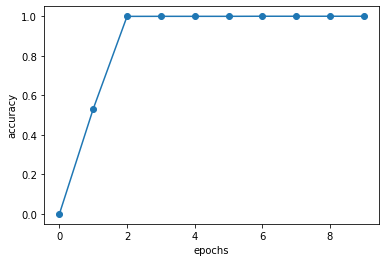

In [8]:
# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.show()